In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans



<div align=right>
<font face="XB Niloofar">
<font size=6 ,bold>
بخش اول:
<p></p>
<font size=4>
 ابتدا تصویر را میخوانیم و سپس تحت فیلتر گاوسی با سایز های 1و3 قرار میدهیم و از هم کم میکنیم تا خروجی مد نظر به دست آید. 

(-0.5, 620.5, 350.5, -0.5)

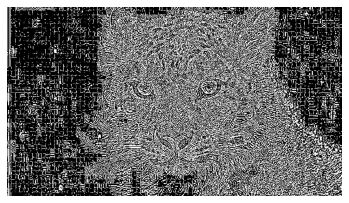

In [2]:
img1 = cv2.imread('img1.jpg')
img2 = cv2.imread('img2.jpg')

img1_gray = cv2.cvtColor(img1 , cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2 , cv2.COLOR_BGR2GRAY)

img1_gaussian1 = cv2.GaussianBlur(img1_gray, (3,3), 0)
img1_gaussian2 = cv2.GaussianBlur(img1_gray, (1,1), 0)
DOG = img1_gaussian1 - img1_gaussian2
plt.imshow(DOG,cmap = 'gray')
plt.axis('off')



<div align=right>
<font face="XB Niloofar">
<font size=6 ,bold>
بخش دوم:
<p></p>
<font size=4>
  به کمک توابع اماده، ویژگی ها را استخراح میکنیم و آنها را نمایش میدهیم، پارامتر های مختلفی برای نمایش تطابق مانند جهت گرادیان و اندازه آن وجود دارد که در کد قرار داده شده.

(-0.5, 400.5, 226.5, -0.5)

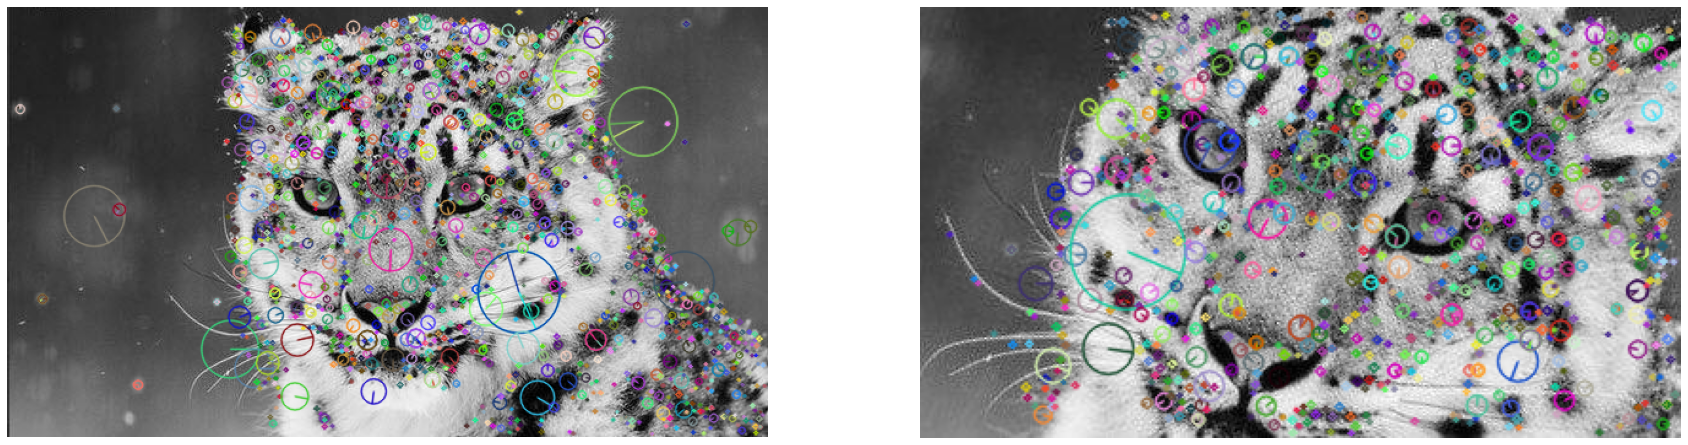

In [27]:
fig, ax = plt.subplots(1,2 , figsize =(30,20))

sift = cv2.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(img1_gray,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2_gray,None)
flags = [cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS,
        cv2.DRAW_MATCHES_FLAGS_DEFAULT,
        cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS,
        cv2.DRAW_MATCHES_FLAGS_DRAW_OVER_OUTIMG

]
img1_features=cv2.drawKeypoints(img1_gray,keypoints_1,img1,flags=flags[0])
plt.subplot(1,2,1)
plt.imshow(img1_features)
plt.axis('off')

img2_features=cv2.drawKeypoints(img2_gray,keypoints_2,img2 , flags=flags[0])
plt.subplot(1,2,2)
plt.imshow(img2_features)
plt.axis('off')

#_,sift_res = feature_matching(img1,keypoints_1, descriptors_1, img2 ,keypoints_2, descriptors_2)
#cv2.imwrite('sift_res.png',sift_res)

(-0.5, 1021.5, 350.5, -0.5)

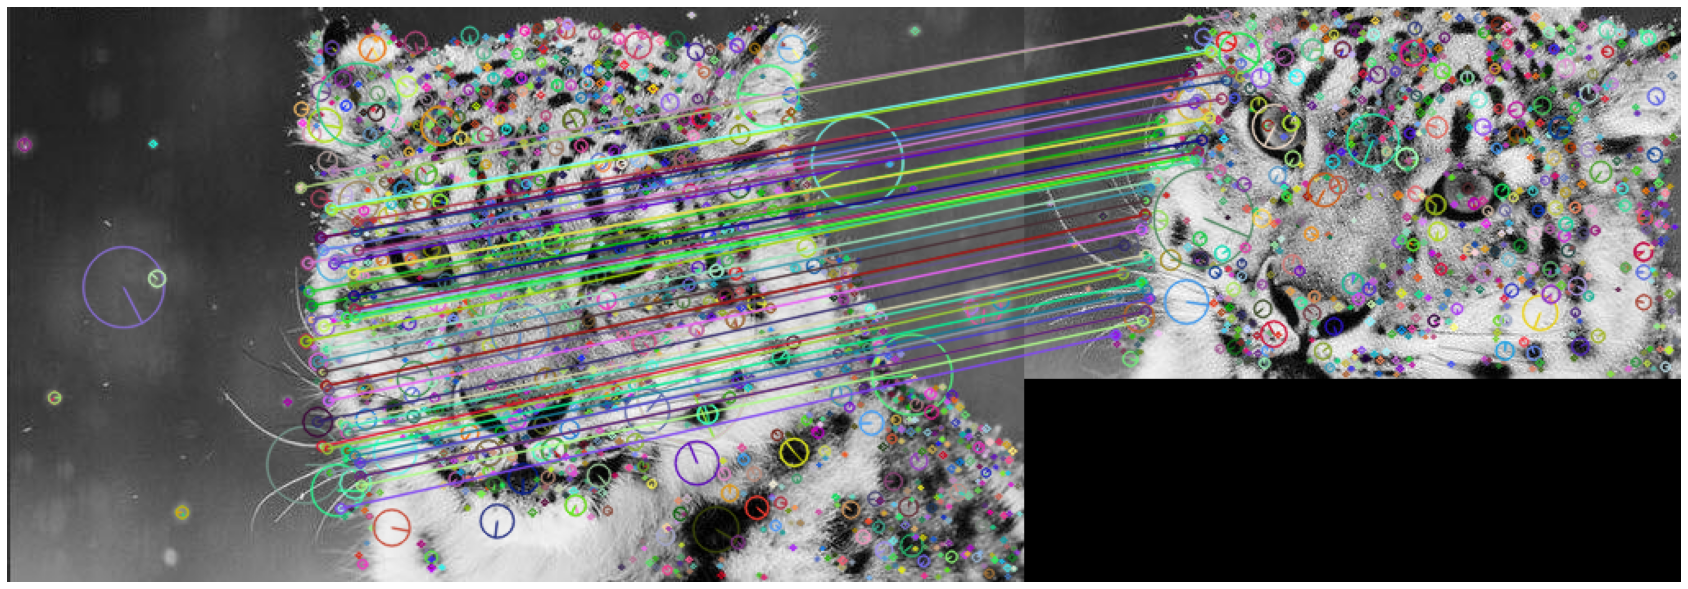

In [5]:
fig, ax = plt.subplots( figsize =(30,20))

bf = cv2.BFMatcher()
matches = bf.knnMatch(descriptors_1,descriptors_2,2)
good = []
for m,n in matches:
    if m.distance < 0.5*n.distance:
        good.append([m])


sift_res = cv2.drawMatchesKnn(img1, keypoints_1, img2, keypoints_2, good[:50], img2, flags=2)
#good,sift_res = feature_matching(img1,keypoints_1, descriptors_1, img2 ,keypoints_2, descriptors_2)
plt.imshow(sift_res )
plt.axis('off')


In [6]:
sift1000 = cv2.xfeatures2d.SIFT_create(nfeatures=1000)

img3 = cv2.imread('img3.jpg')
img1 = cv2.imread('img1.jpg')

img3_gray = cv2.cvtColor(img3 , cv2.COLOR_BGR2GRAY)
img1_gray = cv2.cvtColor(img1 , cv2.COLOR_BGR2GRAY)

keypoints_1, descriptors_1 = sift1000.detectAndCompute(img1_gray,None)
keypoints_3, descriptors_3 = sift1000.detectAndCompute(img3_gray,None)


In [7]:
descriptor = np.append(descriptors_1,descriptors_3,axis = 0)
descriptor.shape

(2000, 128)

In [8]:
kmeans = KMeans(init="random", n_clusters=10, n_init=10, max_iter=100, random_state=42)
kmeans.fit(descriptor)

KMeans(init='random', max_iter=100, n_clusters=10, random_state=42)

In [9]:
centers = kmeans.cluster_centers_
centers.shape

(10, 128)

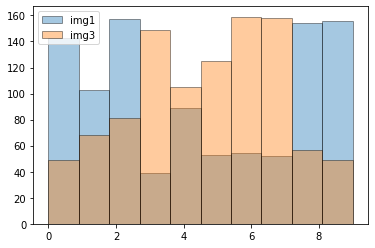

In [10]:
labels = kmeans.labels_
plt.hist(labels[0:1000],bins=10,alpha =0.4 , range =(0,9),histtype='bar', ec='black')
plt.hist(labels[1000:2000],bins=10 ,alpha =0.4, range =(0,9),histtype='bar', ec='black')
plt.legend(["img1", "img3"])

plt.show()


<div align=right>
<font face="XB Niloofar">
<font size=6 ,bold>
بخش آخر:
<p></p>
<font size=4>
پس از خوشه بندی مشاهده شد 5بین اول از نظر فراوانی برای تصویر 3، بین های 3و4و5و6و7و8 بودند و تصویر 1 در سایر بین ها بیشترین فراوانی را داشت
.
    <p></p>
<font size=4>
   با توجه به این مشاهده اگر با کمک یک مجموعه بزرگتر خوشه بندی را انجام دهیم و مجدد 10 بین را در نظر بگیریم و مراکز هر بین را به دست اوریم،سپس ویژگی های استخراج شده از تصاویر تست را با مراکز بین ها مقایسه کنیم و هر کدام را به نزدیکترین بین نسبت دهیم و نموداری مانند نمودار بالا برای ان رسم کنیم،احتمالا بشود طبقه بندی بین این 2 کلاس را انجام داد به این صورت که اگر فراوانی 5 بین میانی زیاد بود هم خانواده تصویر 3 و در غیر این صورت هم خانواده تصویر 1 است.